## Relationship of personality traits with the probability of being employed in Poland

## Abstract

The current challenges of the labour market require a thorough analysis of factors related to the probability of employment of individuals. This paper presents the most important theories related to the labour market, such as the Search and Matching Theory, the Human Capital Theory and the Statistical Discrimination Theory. The Big Five Theory was also introduced and empirical research on the relationship between personality and employability was analyzed. In the research part, based on the data from the PIAAC and post-PIAAC studies, logit models were estimated, aimed at examining the relationship of personality traits with the probability of employment. The results showed that differences in respondents' personalities were related to the probability of employment.

In [202]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


## Data

The analysis was performed based on individual-derived data
from the PIAAC (Programme for the International Assessment of Adult Competencies) for Poland, as well as its national follow-up (post-PIAAC), in which additional information was collected from people participating in the first edition of the study. This data was chosen because it is the only study on the situation of Poles in the labor market that provides not only information about the cognitive skills of respondents, but also their personality traits.

The relationship of personality traits with the probability of employment was estimated using logit model in which the dependent variable is discrete and takes the value of 1 in the case of taking up employment during the post-PIAAC study period and 0 in the case of remaining unemployed or professionally inactive during that period. It was decided to use the logit model because for the purposes of this study, it was important to compare the model with the results of other studies conducted in other countries.

In [203]:
data = pd.read_stata("C:\piaac_study.dta")

selected_data = data[["sq", "eq", "uq", "iq", "nq", "age_r", "age_r2", "gender_r", "edu_lvl2", "train_all", "employ"]]

with warnings.catch_warnings():
     warnings.filterwarnings('ignore')

The dataset includes 4967 rows and 11 columns.

In [204]:
selected_data.shape

(4967, 11)

In [205]:
selected_data.head(5)

,sq,eq,uq,iq,nq,age_r,age_r2,gender_r,edu_lvl2,train_all,employ
0,5.666667,3.333333,6.000000,3.666667,4.666667,23.0,529.0,Male,3.0,2.0,1.0
1,7.000000,4.000000,4.000000,4.000000,4.000000,33.0,1089.0,Male,2.0,0.0,1.0
2,5.000000,2.000000,3.333333,4.333333,3.666667,19.0,361.0,Male,3.0,2.0,1.0
3,6.000000,2.666667,4.000000,3.333333,3.666667,20.0,400.0,Female,4.0,0.0,0.0
4,7.000000,5.000000,6.333333,5.333333,2.333333,19.0,361.0,Male,3.0,0.0,1.0


In [206]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4967 entries, 0 to 4966
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sq         4731 non-null   float32 
 1   eq         4694 non-null   float32 
 2   uq         4720 non-null   float32 
 3   iq         4663 non-null   float32 
 4   nq         4705 non-null   float32 
 5   age_r      4967 non-null   category
 6   age_r2     4967 non-null   float32 
 7   gender_r   4967 non-null   category
 8   edu_lvl2   4967 non-null   float32 
 9   train_all  4967 non-null   float32 
 10  employ     4967 non-null   float32 
dtypes: category(2), float32(9)
memory usage: 225.7 KB


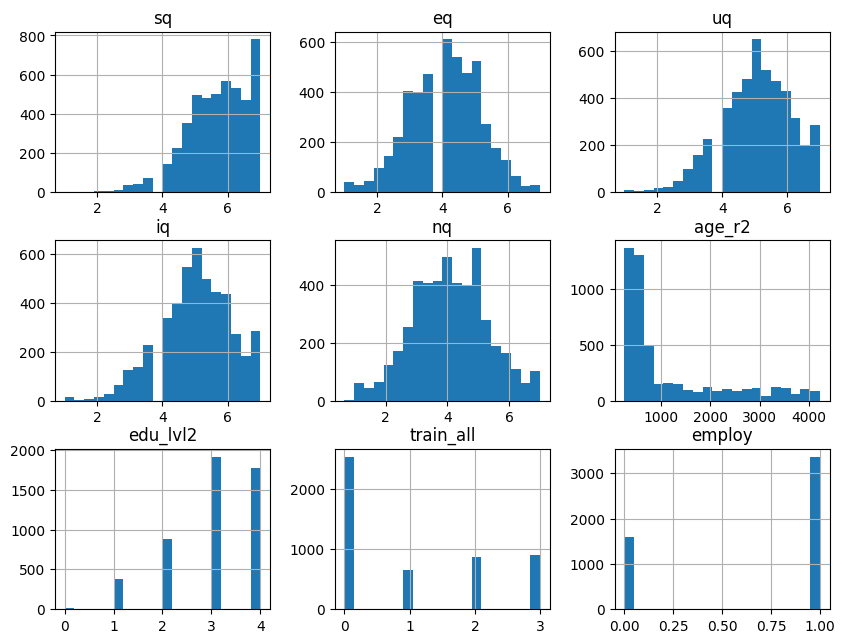

In [207]:
selected_data.hist(bins=20, figsize=(10,7.5))
plt.show()

## Data Cleaning

In [208]:
selected_data = selected_data.rename(columns = {"sq": "conscientiousness",
                                "eq": "extroversion", 
                                "uq": "agreeableness" , 
                                "iq": "openness",
                                "nq": "neuroticism",
                                "age_r": "age",
                                "age_r2": "age_squared",
                                "gender_r": "gender",
                                "edu_lvl2": "education",
                                "train_all": "trained",
                                "employ": "employed_postpiaac"})

Perform label-encoding for categorical variables:

In [209]:
le = LabelEncoder()

for cat_var in ["gender", "education", "trained", "employed_postpiaac"]:
    selected_data[cat_var] = le.fit_transform(selected_data[cat_var])  

In [210]:
cols = ["age", "age_squared"]
selected_data[cols] = selected_data[cols].applymap(np.int64)

In [211]:
selected_data = selected_data[::].round(decimals = 1)

In [212]:
selected_data.head(10)

,conscientiousness,extroversion,agreeableness,openness,neuroticism,age,age_squared,gender,education,trained,employed_postpiaac
0,5.7,3.3,6.0,3.7,4.7,23,529,1,3,2,1
1,7.0,4.0,4.0,4.0,4.0,33,1089,1,2,0,1
2,5.0,2.0,3.3,4.3,3.7,19,361,1,3,2,1
3,6.0,2.7,4.0,3.3,3.7,20,400,0,4,0,0
4,7.0,5.0,6.3,5.3,2.3,19,361,1,3,0,1
5,5.3,5.0,4.3,5.7,3.7,22,484,1,4,1,1
6,7.0,6.7,4.7,7.0,3.7,23,529,0,4,0,1
7,7.0,3.7,6.3,6.7,5.3,34,1156,1,3,0,1
8,5.0,4.3,3.0,4.7,4.7,25,625,1,4,0,1
9,5.7,3.7,4.7,5.7,3.7,23,529,1,1,2,1


Find missing values:

In [213]:
selected_data.isna().values.any()

True

In [214]:
selected_data.isna().sum()

conscientiousness     236
extroversion          273
agreeableness         247
openness              304
neuroticism           262
age                     0
age_squared             0
gender                  0
education               0
trained                 0
employed_postpiaac      0
dtype: int64

As the analyzed sample is relatively small and the missing data are present for variables related to the personality traits, in order not to lose too much information, it was decided to use the imputation method for replacing missing data. 

In [216]:
imputer = SimpleImputer(strategy="median")

In [218]:
imputer.fit(selected_data)

SimpleImputer(strategy='median')

In [219]:
X = imputer.transform(selected_data)

As a result of the transformation, the NumPy array was obtained, which was then placed in the DataFrame object:

In [220]:
clean_data = pd.DataFrame(X, columns = selected_data.columns, index = selected_data.index)